### Step 1: Import Libraries
First, we need to import the necessary libraries.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for better visualization
sns.set(style="whitegrid")


### Step 2: Load the Dataset
Next, we load the Titanic dataset into a DataFrame.

In [7]:
# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Feature-Engineering-Live-sessions-master/titanic.csv')

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 3: Understand the Dataset
Now, let's get a basic understanding of the dataset, including the structure and summary statistics.

In [8]:
# Check the structure of the dataset
df.info()

# Get summary statistics of the dataset
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 4: Handling Missing Data
Missing data can skew the analysis, so identifying and dealing with it is crucial.

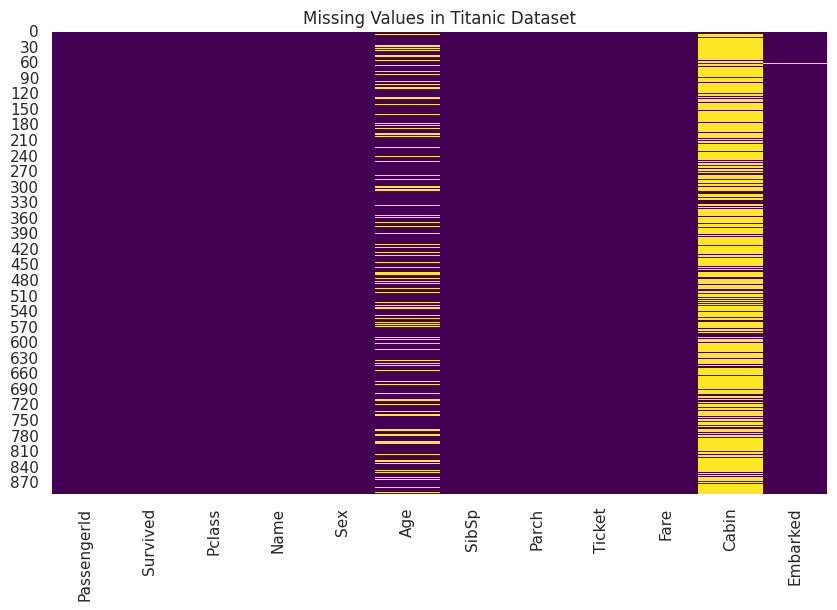

In [9]:
# Check for missing values
df.isnull().sum()

# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Titanic Dataset")
plt.show()


### Step 5: Data Cleaning
Handle missing data appropriately (e.g., imputation, dropping rows/columns).

<ipython-input-10-e6423e16e3dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-10-e6423e16e3dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

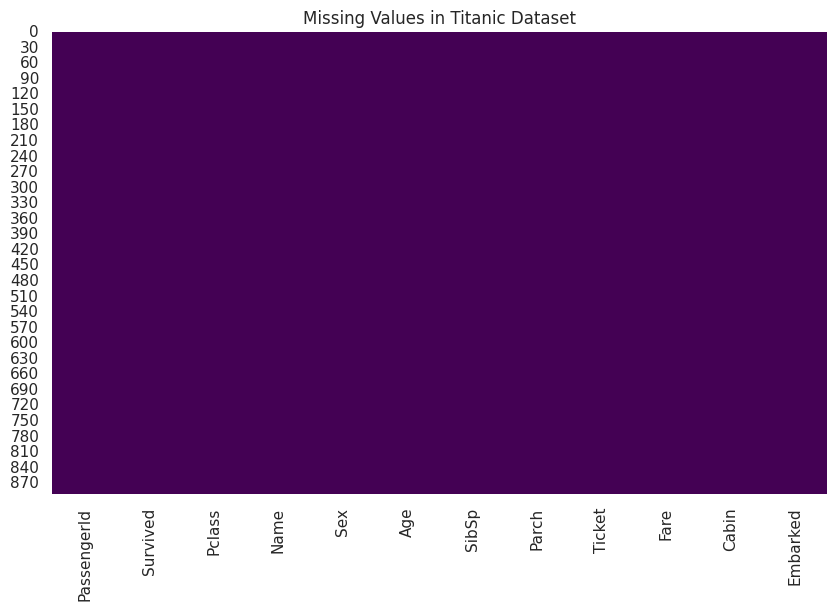

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.isnull().sum()

# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Titanic Dataset")
plt.show()

### Step 6: Univariate Analysis
Let's analyze individual features.

<ipython-input-11-57e3177af467>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette="viridis")


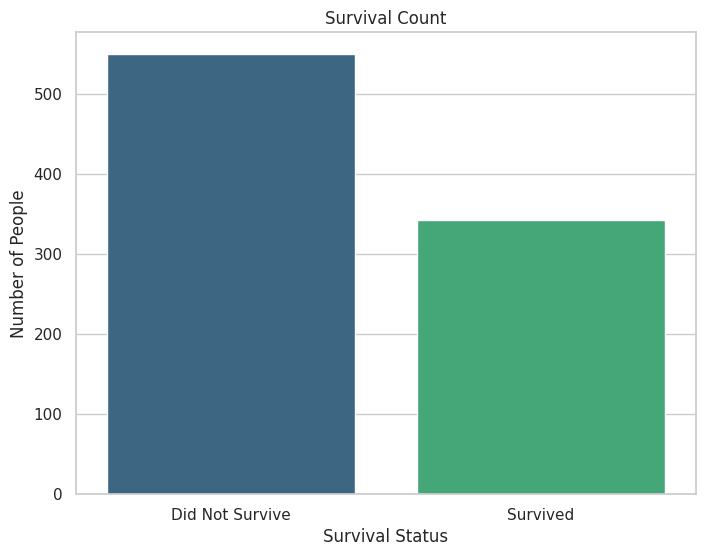

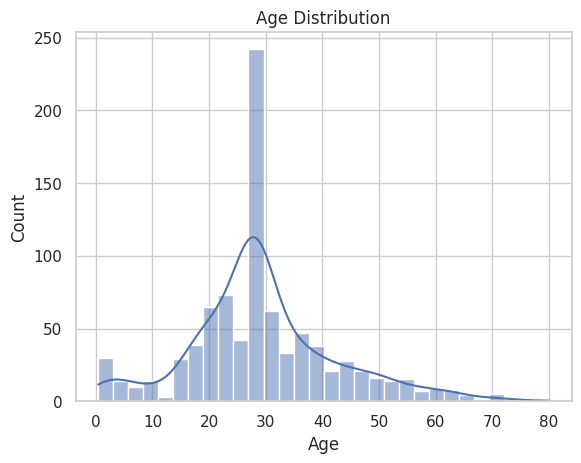

In [11]:
# Distribution of 'Survived'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', palette="viridis")
plt.title('Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()


# Distribution of 'Age'
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()




### Step 7: Bivariate Analysis
Examine the relationship between two variables.

Sex
female    233
male      109
Name: Survived, dtype: int64


<ipython-input-12-32cbd1691498>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_by_sex.index, y=survived_by_sex.values, palette="viridis")


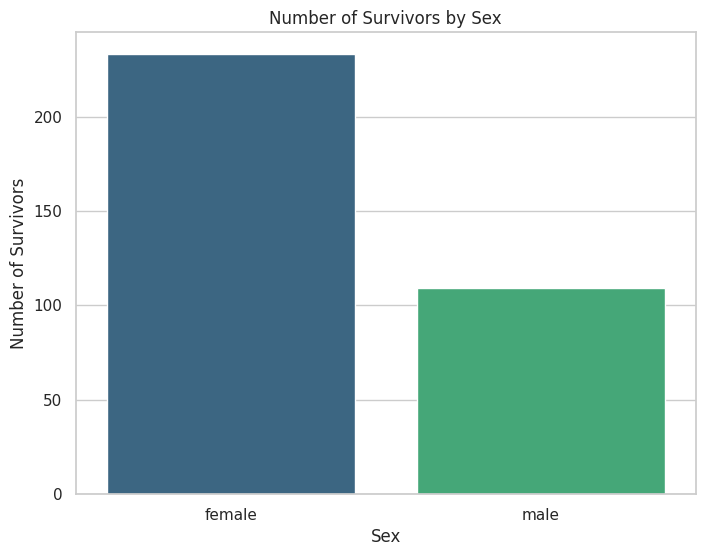

In [12]:

# Group the data by 'Sex' and calculate the sum of 'Survived'
survived_by_sex = df.groupby('Sex')['Survived'].sum()
print(survived_by_sex)
# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_by_sex.index, y=survived_by_sex.values, palette="viridis")
plt.title('Number of Survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.show()







In [13]:

# Cross-tabulation
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
print(cross_tab)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


<ipython-input-25-c55e913c8672>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='pastel')


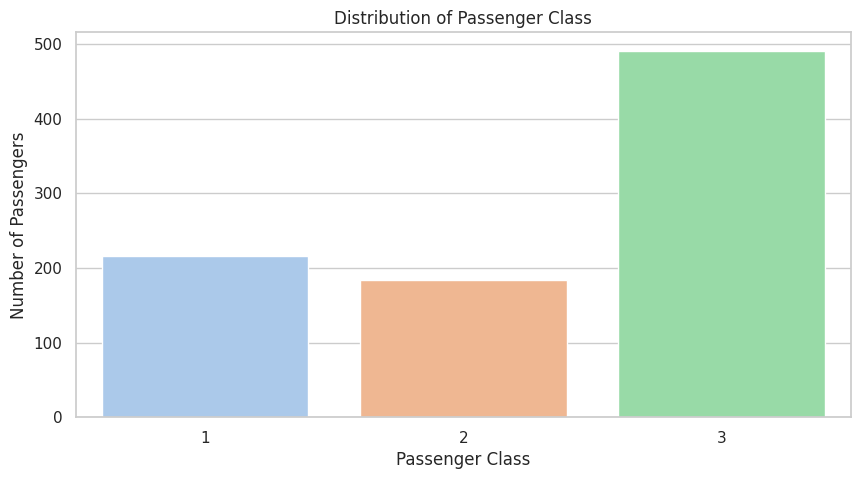

In [25]:
plt.figure(figsize=(10, 5))

# Create a countplot for the Pclass column
sns.countplot(x='Pclass', data=df, palette='pastel')

# Add titles and labels
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')

# Show the plot
plt.show()

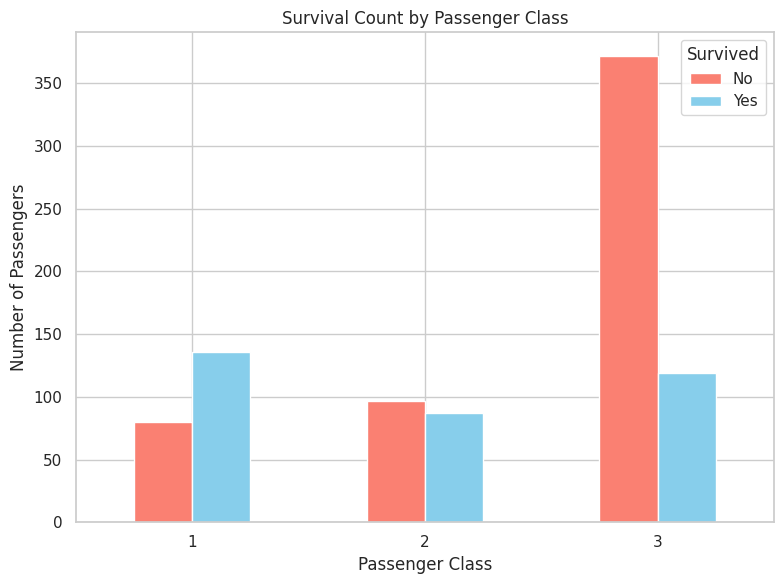

In [14]:
cross_tab.plot(kind='bar', figsize=(8,6), color=['salmon', 'skyblue'])

plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

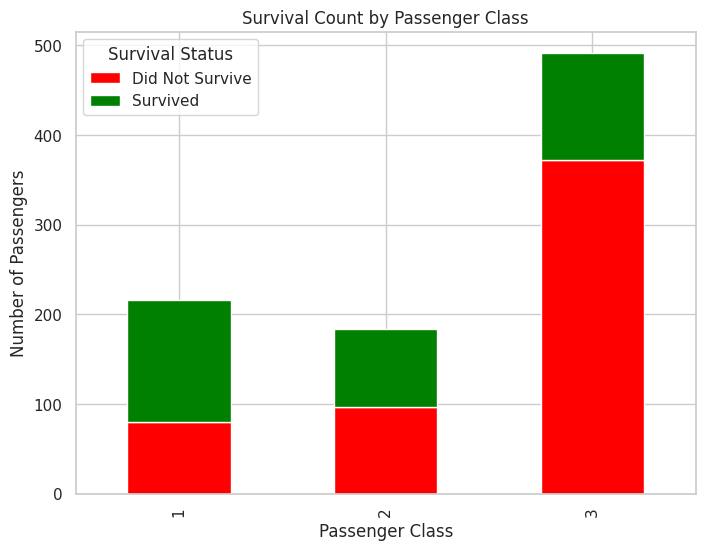

In [15]:
# Plotting the cross-tabulation as a stacked bar plot
cross_tab.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))

plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'], title='Survival Status')
plt.show()

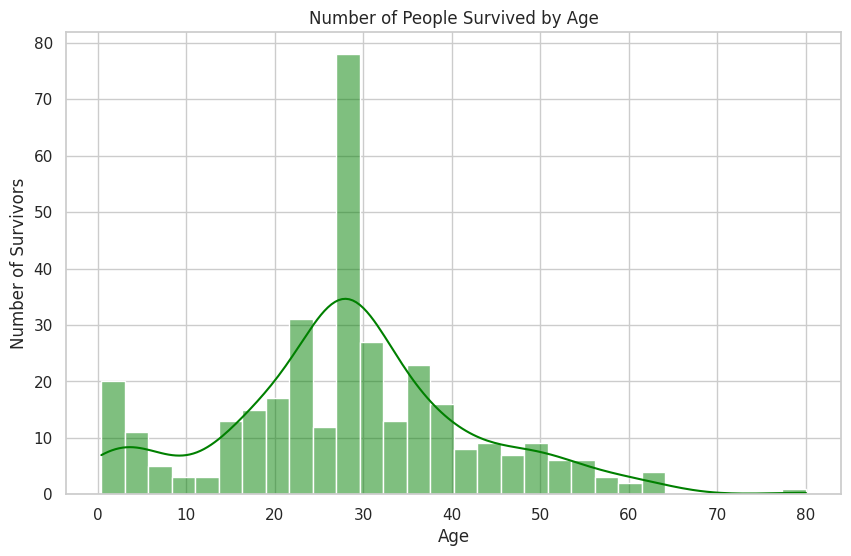

In [16]:
# Plot: Number of People Survived by Age
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, bins=30, color='green')
plt.title('Number of People Survived by Age')
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.show()

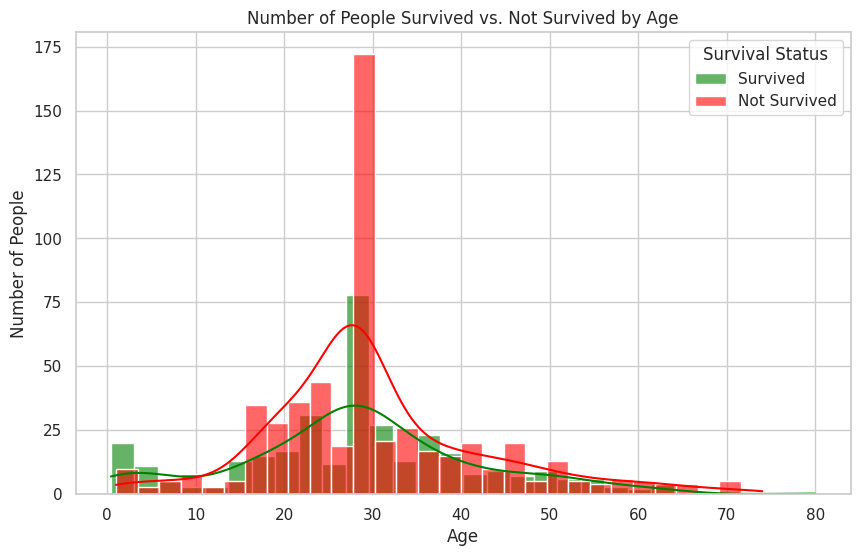

In [26]:
# Plot: Number of People Survived vs. Not Survived by Age
plt.figure(figsize=(10, 6))

# Plot for survived
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, bins=30, color='green', label='Survived', alpha=0.6)

# Plot for not survived
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, bins=30, color='red', label='Not Survived', alpha=0.6)

plt.title('Number of People Survived vs. Not Survived by Age')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.legend(title='Survival Status')
plt.show()


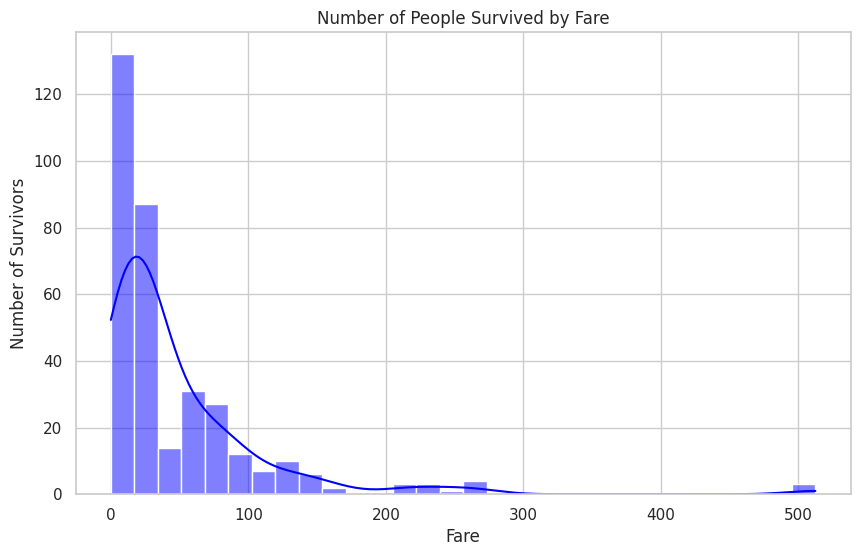

In [18]:
# Plot: Number of People Survived by Fare
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Fare'], kde=True, bins=30, color='blue')
plt.title('Number of People Survived by Fare')
plt.xlabel('Fare')
plt.ylabel('Number of Survivors')
plt.show()


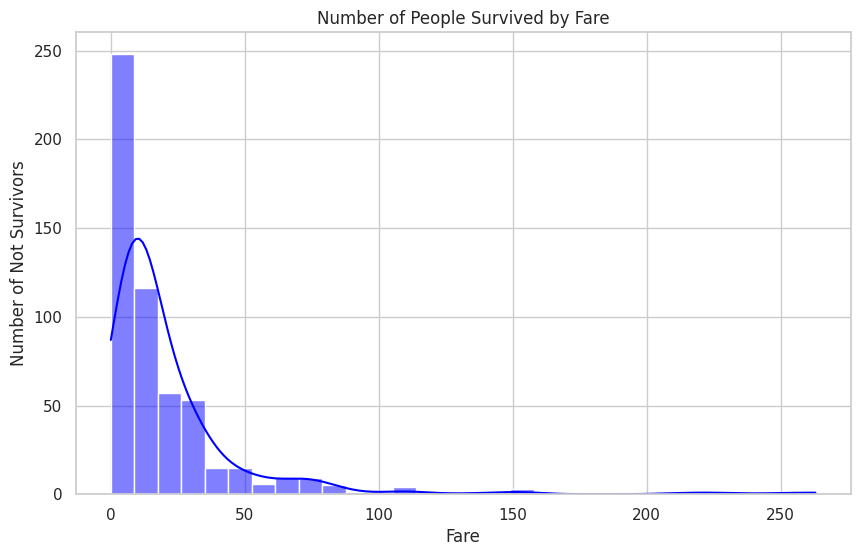

In [19]:
# Plot: Number of People Survived by Fare
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 0]['Fare'], kde=True, bins=30, color='blue')
plt.title('Number of People Survived by Fare')
plt.xlabel('Fare')
plt.ylabel('Number of Not Survivors')
plt.show()


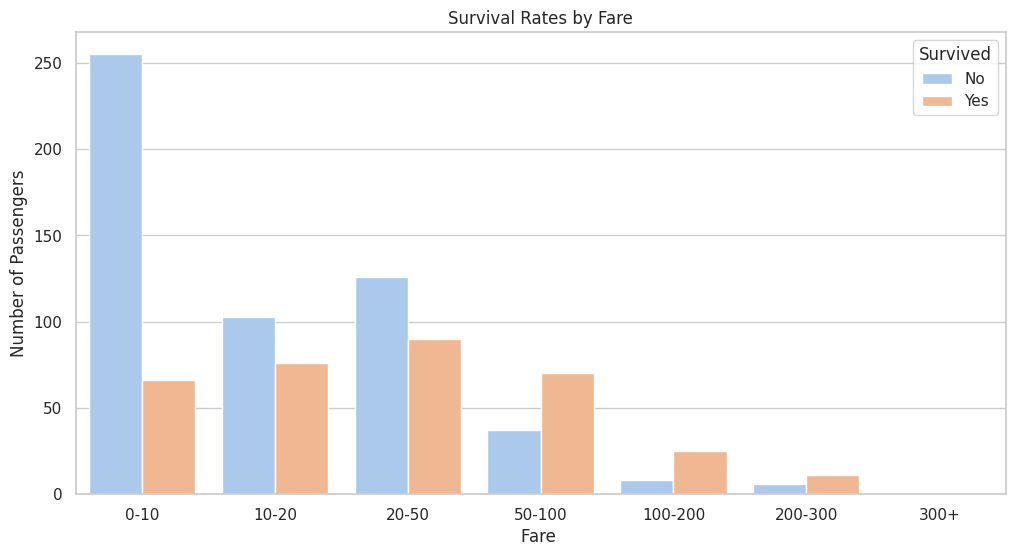

In [27]:
fare_bins = [0, 10, 20, 50, 100, 200, 300, 500]
fare_labels = ['0-10', '10-20', '20-50', '50-100', '100-200', '200-300', '300+']
df['Fare_Binned'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a grouped bar plot for Survival by Fare Bins
sns.countplot(x='Fare_Binned', hue='Survived', data=df, palette='pastel')

# Add titles and labels
plt.title('Survival Rates by Fare')
plt.xlabel('Fare ')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

# Show the plot
plt.show()

<ipython-input-20-95944bce6cf1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Survived'] == 1], x='Cabin_Category', palette="viridis", order=df['Cabin_Category'].value_counts().index)


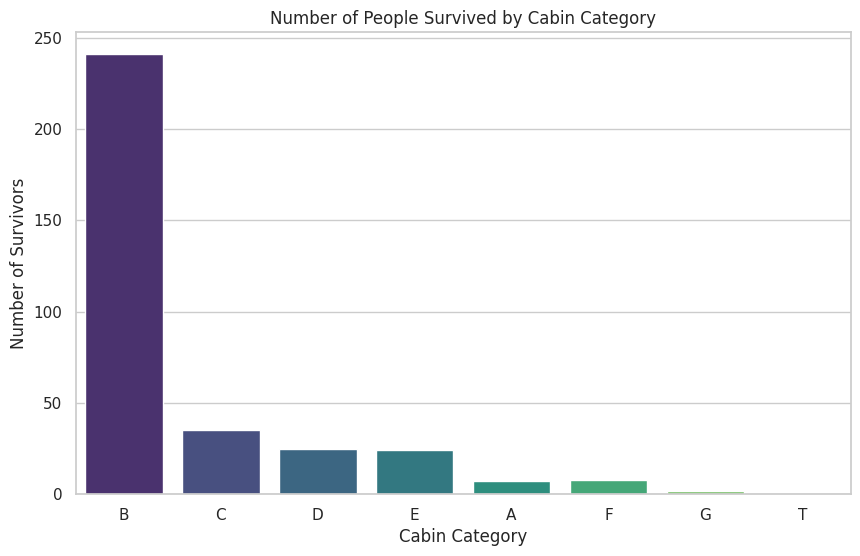

In [20]:
# Extract the first letter of the cabin to categorize
df['Cabin_Category'] = df['Cabin'].str[0]

# Plot: Number of People Survived by Cabin Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Survived'] == 1], x='Cabin_Category', palette="viridis", order=df['Cabin_Category'].value_counts().index)
plt.title('Number of People Survived by Cabin Category')
plt.xlabel('Cabin Category')
plt.ylabel('Number of Survivors')
plt.show()


<ipython-input-21-b3d3bdf9ce3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Survived'] == 0], x='Cabin_Category', palette="viridis", order=df['Cabin_Category'].value_counts().index)


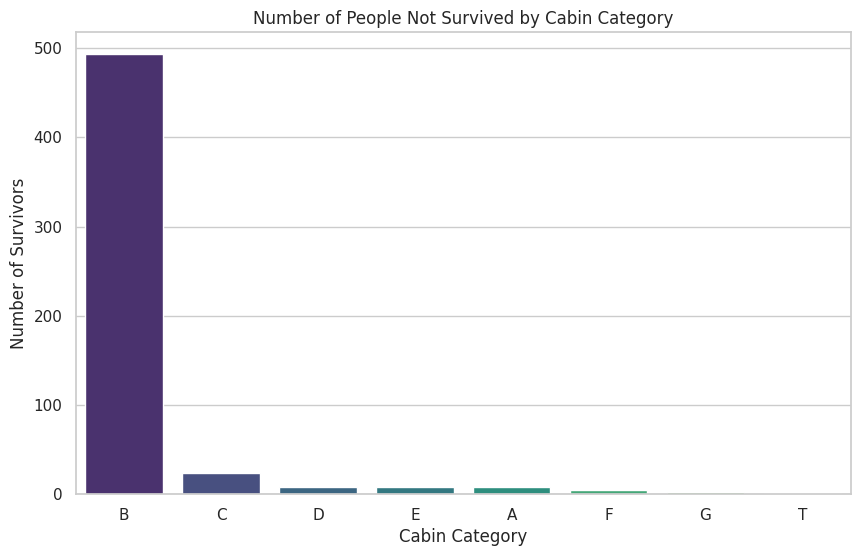

In [21]:
# Extract the first letter of the cabin to categorize
df['Cabin_Category'] = df['Cabin'].str[0]

# Plot: Number of People Survived by Cabin Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Survived'] == 0], x='Cabin_Category', palette="viridis", order=df['Cabin_Category'].value_counts().index)
plt.title('Number of People Not Survived by Cabin Category')
plt.xlabel('Cabin Category')
plt.ylabel('Number of Survivors')
plt.show()


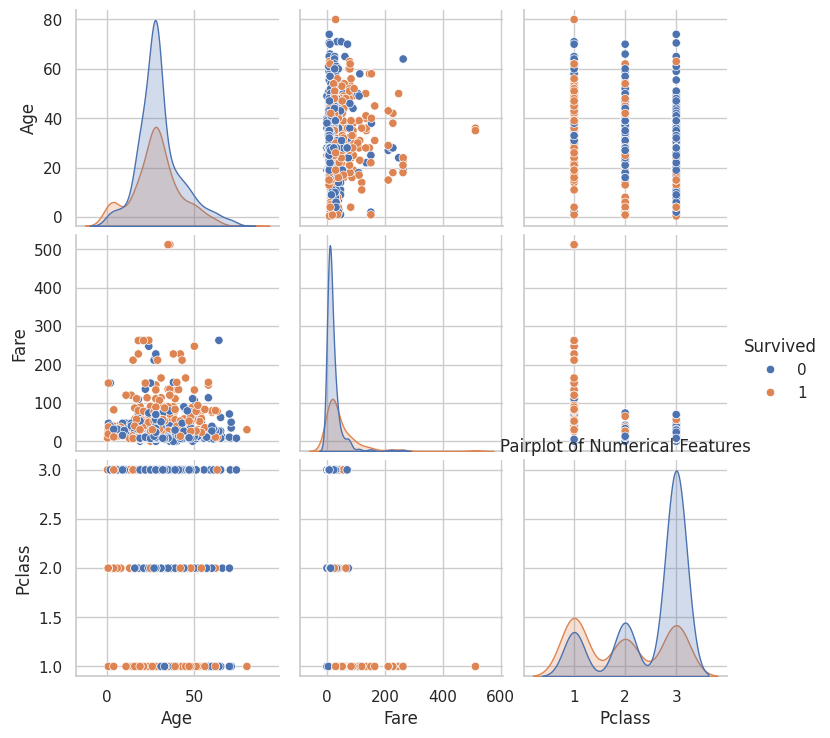

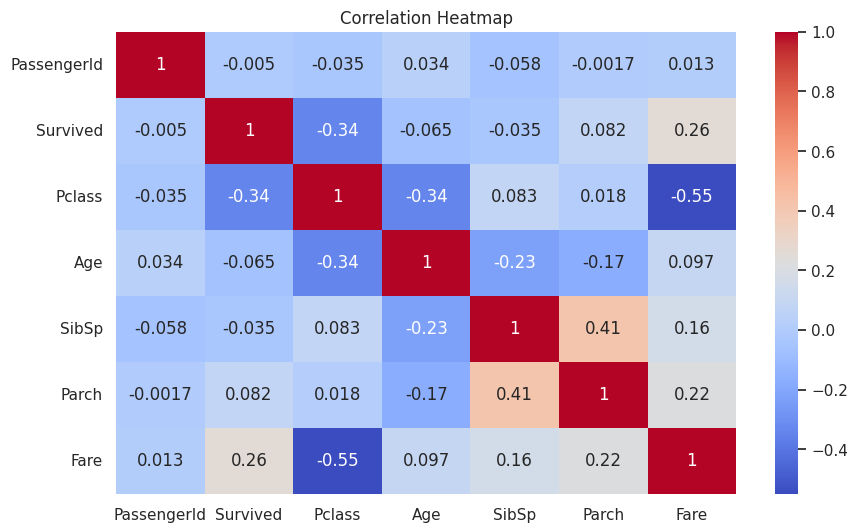

In [22]:
# Pairplot for numerical variables
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.title('Pairplot of Numerical Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
# Remove non-numeric columns before calculating correlation
num_df = df.select_dtypes(include=['number'])
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Outliers are typically defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where IQR is the interquartile range (Q3 - Q1).

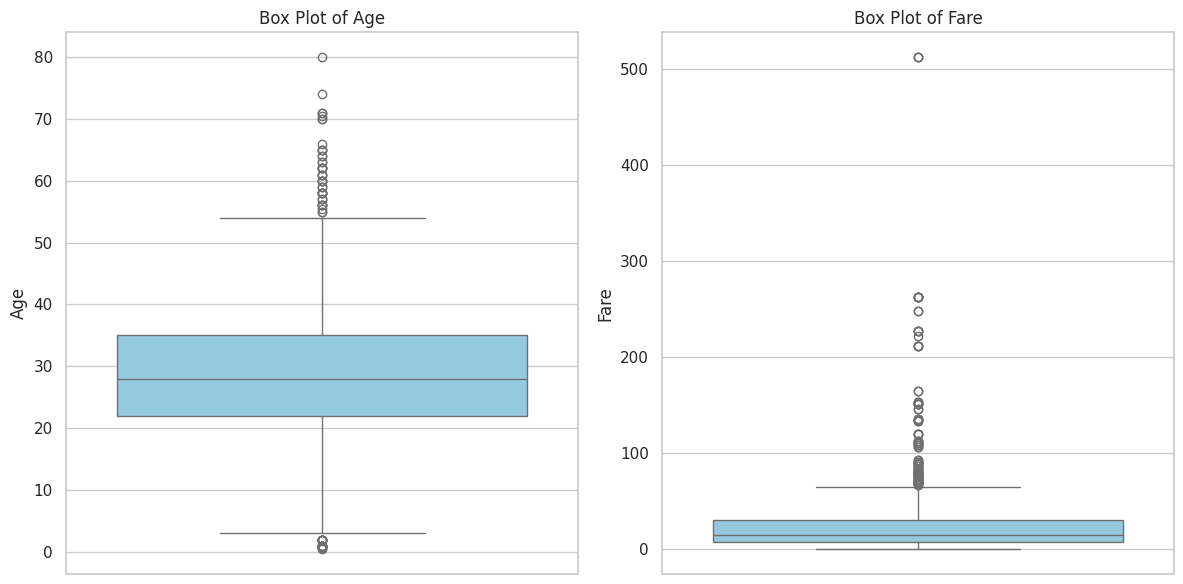

In [23]:

# Select numerical columns for box plot analysis
numerical_columns = ['Age', 'Fare']

# Create box plots for each numerical column to identify outliers
plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


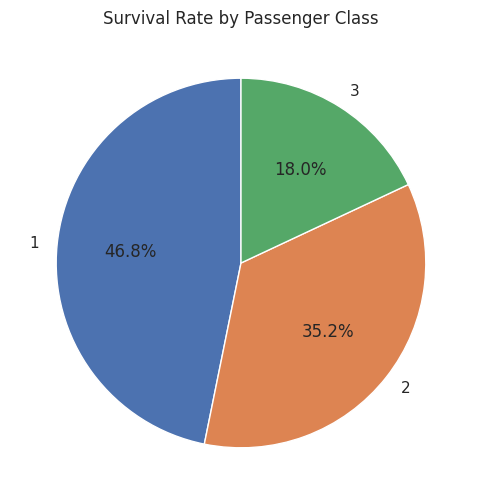

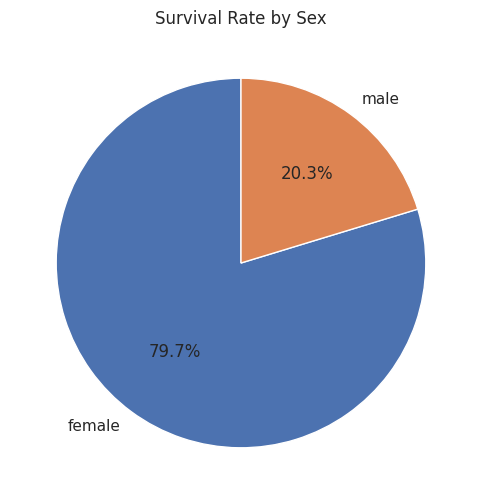

Frequency of survival:
Survived
0    549
1    342
Name: count, dtype: int64


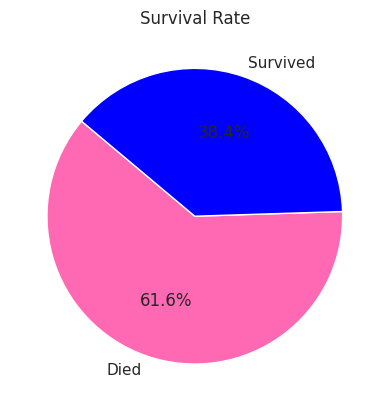


Conclusion:
The pie charts illustrate the distribution of survival rates across passenger classes and genders.
Passengers in higher classes (1st) and females had notably higher survival rates.
Further analysis can explore the impact of other factors and develop predictive models.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your previous code for data loading, cleaning, etc.) ...

# Survival Rate by Passenger Class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(6, 6))
survival_by_class.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('')  # Remove the default ylabel
plt.show()

# Survival Rate by Gender
survival_by_sex = df.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(6, 6))
survival_by_sex.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate by Sex')
plt.ylabel('')  # Remove the default ylabel
plt.show()

survived = df['Survived'].value_counts()
labels = ['Died', 'Survived']
colors = ['hotpink', 'blue']  # Custom colors

survived_counts = df['Survived'].value_counts()
print("Frequency of survival:")
print(survived_counts)

plt.pie(survived, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Survival Rate')
plt.show()

# ... (Add similar code for other factors like age, family size, etc.) ...

# Conclusion:
print("\nConclusion:")
print("The pie charts illustrate the distribution of survival rates across passenger classes and genders.")
print("Passengers in higher classes (1st) and females had notably higher survival rates.")
print("Further analysis can explore the impact of other factors and develop predictive models.")